<a href="https://colab.research.google.com/github/cristopherordonez/Analisis_Demografico_Python_Pandas/blob/main/Actividad_S12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#---Actividad sesión 12--#

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
uploaded = files.upload()

Saving empleados_sesion12.xlsx to empleados_sesion12.xlsx


In [15]:
df = pd.read_excel("/content/empleados_sesion12.xlsx")
display(df.head())

,EmpleadoID,Departamento,AñosExperiencia,SalarioAnual
0,1,Ventas,2,45000
1,2,TI,5,70000
2,3,Ventas,3,50000
3,4,Marketing,7,85000
4,5,TI,8,95000


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmpleadoID       20 non-null     int64 
 1   Departamento     20 non-null     object
 2   AñosExperiencia  20 non-null     int64 
 3   SalarioAnual     20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [18]:
df.describe()

,EmpleadoID,AñosExperiencia,SalarioAnual
count,20.00000,20.00000,20.000000
mean,10.50000,6.55000,83400.000000
std,5.91608,4.80652,48562.927164
min,1.00000,1.00000,25000.000000
25%,5.75000,3.00000,51500.000000
50%,10.50000,5.50000,76500.000000
75%,15.25000,8.25000,97500.000000
max,20.00000,22.00000,250000.000000


In [19]:
media_salario = df['SalarioAnual'].mean()
mediana_salario = df['SalarioAnual'].median()
moda_salario = df['SalarioAnual'].mode()

print(f"Media (Promedio): ${media_salario:,.2f}")
print(f"Mediana (Valor Central): ${mediana_salario:,.2f}")
print(f"Moda (Más Frecuente): {list(moda_salario)}")

Media (Promedio): $83,400.00
Mediana (Valor Central): $76,500.00
Moda (Más Frecuente): [25000, 40000, 45000, 48000, 50000, 52000, 55000, 58000, 70000, 75000, 78000, 80000, 85000, 92000, 95000, 105000, 115000, 120000, 130000, 250000]


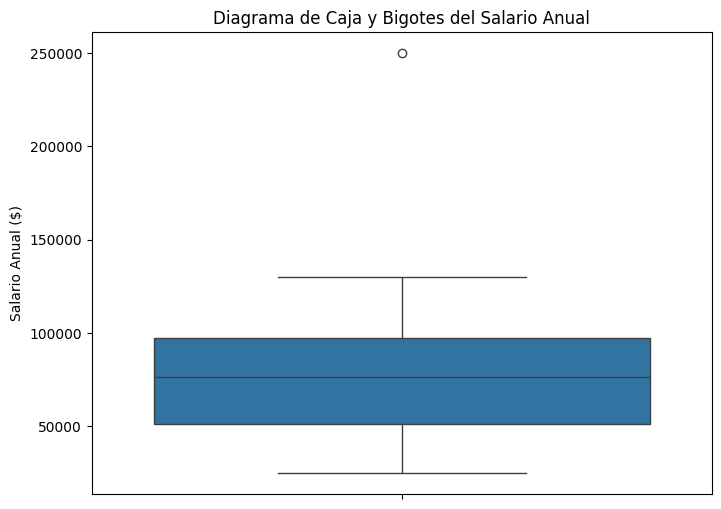

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['SalarioAnual'])
plt.title('Diagrama de Caja y Bigotes del Salario Anual')
plt.ylabel('Salario Anual ($)')
plt.show()

In [21]:
Q1 = df['SalarioAnual'].quantile(0.25)
Q3 = df['SalarioAnual'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers = df[(df['SalarioAnual'] > limite_superior) | (df['SalarioAnual'] < limite_inferior)]

print(f"Q1 (Percentil 25): ${Q1:,.2f}")
print(f"Q3 (Percentil 75): ${Q3:,.2f}")
print(f"Rango Intercuartílico (IQR): ${IQR:,.2f}")
print(f"Límite Superior para Outliers: ${limite_superior:,.2f}")
print(f"Límite Inferior para Outliers: ${limite_inferior:,.2f}")

print("\nValores atípicos (Outliers) encontrados:")
print(outliers[['EmpleadoID', 'SalarioAnual']])

# Conteo de Outliers
conteo_outliers = len(outliers)

Q1 (Percentil 25): $51,500.00
Q3 (Percentil 75): $97,500.00
Rango Intercuartílico (IQR): $46,000.00
Límite Superior para Outliers: $166,500.00
Límite Inferior para Outliers: $-17,500.00

Valores atípicos (Outliers) encontrados:
    EmpleadoID  SalarioAnual
12          13        250000


In [29]:
df_filtrado = df[~df.index.isin(outliers.index)]
print(f"Tamaño filtrado: {len(df_filtrado)}")
print(f"Tamaño original: {len(df)}")

Tamaño filtrado: 19
Tamaño original: 20


In [28]:
salario_antes = df['SalarioAnual'].agg(['mean', 'std'])
salario_despues = df_filtrado['SalarioAnual'].agg(['mean', 'std'])

comparacion = pd.DataFrame({
    'Antes de Eliminar Outliers': salario_antes,
    'Después de Eliminar Outliers': salario_despues
})
comparacion['Diferencia Absoluta'] = abs(comparacion['Antes de Eliminar Outliers'] - comparacion['Después de Eliminar Outliers'])

print(comparacion)

      Antes de Eliminar Outliers  Después de Eliminar Outliers  \
mean                83400.000000                  74631.578947   
std                 48562.927164                  29432.050796   

      Diferencia Absoluta  
mean          8768.421053  
std          19130.876368  


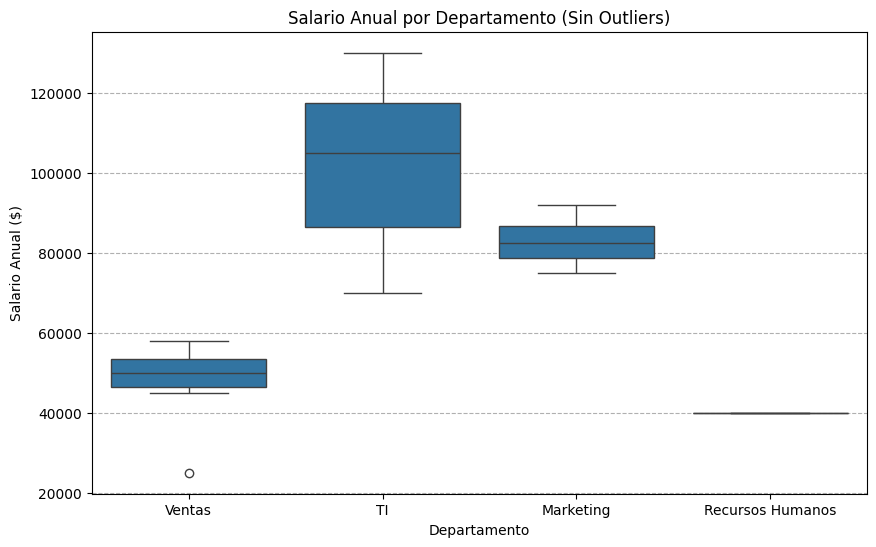

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Departamento', y='SalarioAnual', data=df_filtrado)
plt.title('Salario Anual por Departamento (Sin Outliers)')
plt.ylabel('Salario Anual ($)')
plt.xlabel('Departamento')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# Análisis por Departamento (Boxplots - Datos Filtrados)

# ¿Qué nos presenta el gráfico?

El diagrama de caja y bigotes compara la distribución salarial entre departamentos utilizando el conjunto de datos **sin el outlier** (el salario de $250,000).

- **Media/Mediana:** El departamento de **TI** tiene la mediana salarial (línea central) **más alta**, mientras que **Ventas** tiene la mediana **más baja**.
- **Variabilidad (Dispersión):** **Marketing** y **TI** muestran rangos salariales más amplios (cajas más grandes), indicando mayor variabilidad salarial interna.
- **Conclusión:** Para el empleado "típico" de la empresa (excluyendo el outlier), el departamento de **TI es el mejor pagado** en promedio.